In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [17]:
df= pd.read_excel('./859181_INDICES_v_3_conductas.xlsx', header= 4)

In [18]:
df ['Fecha']=pd.to_datetime(df['Fecha'])
df.head()

,Unnamed: 0,SP,Fecha,Resol. No.,Empresas,Mercado,Categoria,Conducta,Conducta categorizadas,Sancion,DETALLE,Unnamed: 11
0,NaN,326599,2002-10-17,46,"Beverage Associates Corp, Quilmes Industrialm ...",Mercado de la cerveza,bebidas,Carteles - Acuerdo de Precios - Archivo,Cartelizacion,Archivo,Realización de una operación de concentración ...,NaN
1,NaN,323089,1980-11-09,[127],The Buenos Aires Herald Ltda. / Sociedad de Di...,Distribución de diarios.,comunicacion,Distribución - Negativa -,NaN,Archivo,_,NaN
2,NaN,321373,1981-04-12,124,Acindar Industria Argentina de Aceros S.A. / S...,MANUFACTURING Fabricación de metales comunes -...,energia,Póliticas de precios - Guerra de precios - Con...,NaN,Archivo,Para que la guerra de precios pueda considerar...,NaN
3,NaN,321185,1981-08-09,257,Juan Ignacio Borchex y Oscar Dos Reis / Asocia...,Servicio funerario,funerario,Abuso de posición dominante,Abuso posicion dominante,Archivo,Extensión de servicio mutual a personas no mut...,NaN
4,NaN,321190,1981-08-18,302,Tiboni y Cía S.R.L. / Sorensen y Cía. S.R.L.,Pantógrafos (calado o perforado de cristales p...,automotor,Trato exclusivo - patentes,NaN,Archivo,La denunciada ejerció una serie de presiones s...,NaN


# Normalizacion

In [19]:
#convertir todas las que son str lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

#eliminar los simbolos
df['Mercado'] = [re.sub("[\W+]",' ', str(x)) for x in df['Mercado']]
df['Conducta']= [re.sub("[\W+]",' ', str(x)) for x in df['Conducta']]

##convertir esto en una lista de palabras a eliminar.
filtrar = ['mercado', 'servicio', 'servicios', 'fabricación', 'fabricacion', 'fabricacion', 'manufacturing', 'mencionado', 'productos']
df['Mercado'] = df['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))
filtrar1 = ['archivo', 'nan'] 
df ['Conducta'] = df ['Conducta'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar1)]))

#eliminamos las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
df['Mercado'] = df['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['Conducta'] = df['Conducta'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

##Tareas: en donde es nan el mercado, buscar completar. 
df.replace('', np.nan, inplace=True)

In [20]:
df

,Unnamed: 0,SP,Fecha,Resol. No.,Empresas,Mercado,Categoria,Conducta,Conducta categorizadas,Sancion,DETALLE,Unnamed: 11
0,NaN,326599,2002-10-17,46,"beverage associates corp, quilmes industrialm ...",cerveza,bebidas,carteles acuerdo precios,cartelizacion,archivo,realización de una operación de concentración ...,NaN
1,NaN,323089,1980-11-09,[127],the buenos aires herald ltda. / sociedad de di...,distribución diarios,comunicacion,distribución negativa,NaN,archivo,_,NaN
2,NaN,321373,1981-04-12,124,acindar industria argentina de aceros s.a. / s...,metales comunes siderurgico,energia,póliticas precios guerra precios conducta excl...,NaN,archivo,para que la guerra de precios pueda considerar...,NaN
3,NaN,321185,1981-08-09,257,juan ignacio borchex y oscar dos reis / asocia...,funerario,funerario,abuso posición dominante,abuso posicion dominante,archivo,extensión de servicio mutual a personas no mut...,NaN
4,NaN,321190,1981-08-18,302,tiboni y cía s.r.l. / sorensen y cía. s.r.l.,pantógrafos calado perforado cristales automóv...,automotor,trato exclusivo patentes,NaN,archivo,la denunciada ejerció una serie de presiones s...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
829,NaN,986108 + 986109,2017-03-14,180,"colegio de farmacéuticos de tucumán, asociació...",actividades sanitarias sociales,cirujano,medida cautelar asociación cámara colegio,NaN,medida cautelar,ordénase al colegio de farmacéuticos de tucumá...,NaN
830,NaN,342684,2011-02-07,17,la veloz del norte,nan,falta analisis,NaN,falta analisis,multa,denuncia efectuada por las firmas empresa almi...,NaN
831,NaN,987339,2019-09-19,605,colegio de farmacéuticos de tucumán s/ infracc...,actividades sanitarias sociales dispensa medic...,medicamento,artículo 53 ley n 25 156 recurso directo apela...,inaplicable,desestímanse por inadmisibles los recursos dir...,"con fecha 8 de febrero de 2018, la asociación...",NaN
832,NaN,987340,2019-09-19,595,cooperativa eléctrica y anexos ltada. c.e.y.a....,información comunicación televisión cable,television,cumplimiento compromiso,falta analisis,archivo,NaN,NaN


In [21]:
texto = df[df['Conducta'].notnull()]['Conducta'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

In [7]:
##pip install wordcloud

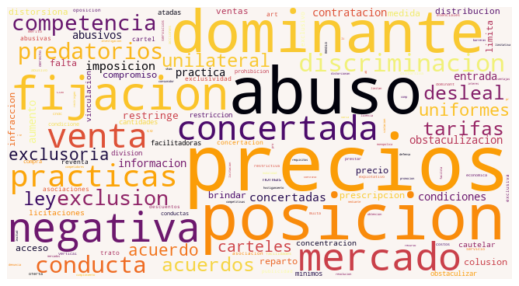

In [22]:
from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

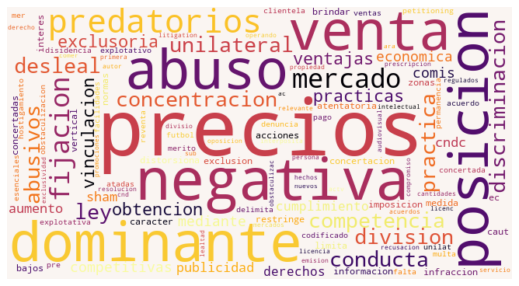

In [23]:
df_tv = df [df["Categoria"] == "television"].copy()
df_tv.reset_index(drop=True, inplace=True)
df_tv.shape

texto = df_tv[df_tv ['Conducta'].notnull()]['Conducta'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

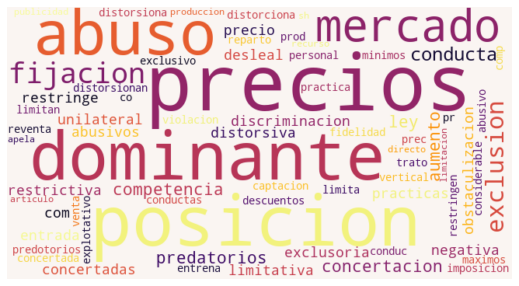

In [24]:
df_medicamento = df [df["Categoria"] == "medicamento"].copy()
df_medicamento.reset_index(drop=True, inplace=True)
texto = df_medicamento[df_medicamento ['Conducta'].notnull()]['Conducta'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

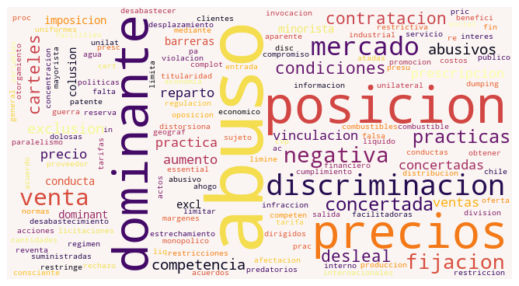

In [28]:
df_energia = df [df["Categoria"] == "energia "].copy()
df_energia.reset_index(drop=True, inplace=True)
df_energia.shape

texto = df_energia [df_energia ['Conducta'].notnull()]['Conducta'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

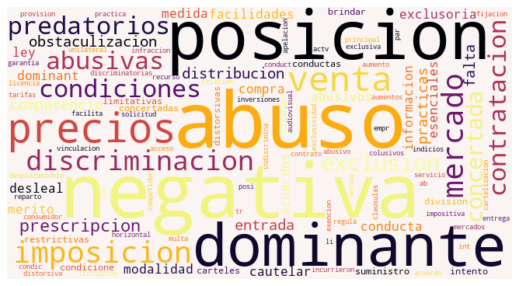

In [29]:
df_comunicacion = df [df["Categoria"] == "comunicacion"].copy()
df_comunicacion.reset_index(drop=True, inplace=True)
df_comunicacion.shape

texto = df_comunicacion [df_comunicacion ['Conducta'].notnull()]['Conducta'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

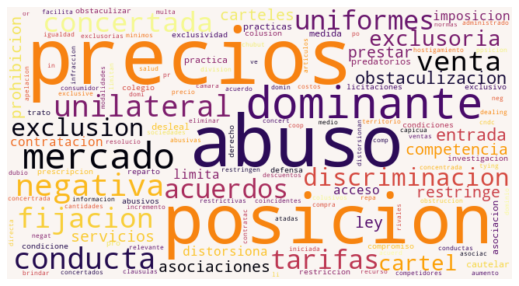

In [30]:
df_indmed = df [df["Categoria"] == "cirujano"].copy()
df_indmed.reset_index(drop=True, inplace=True)
df_indmed.shape

texto = df_indmed [df_indmed ['Conducta'].notnull()]['Conducta'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

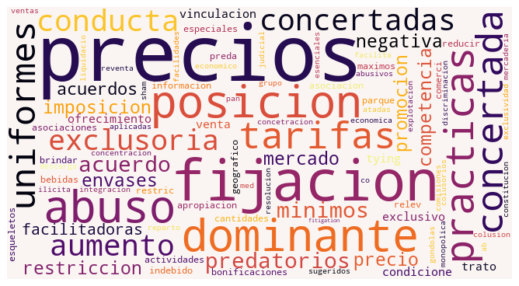

In [31]:
df_alimentos = df [df["Categoria"] == "alimentos"].copy()
df_alimentos.reset_index(drop=True, inplace=True)
df_alimentos.shape

texto = df_alimentos [df_alimentos ['Conducta'].notnull()]['Conducta'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
df_tv.shape

(67, 12)

In [35]:
df_tv ['Resol. No.'].unique()

array([71, 200, 243, '[187]', 524, 1136, 336, 850, 122, 445, 248,
       'dictamen 351', 28, 123, 130, 14, 23, 22, 39, 37, 17, 47, 78, 25,
       67, 66, 51, 68, 110, 112, 82, 84, 174, 175, 86, 150, 20, 188, 166,
       219, 19, 129, 149, 218, 249, 329, 778, 655, 691, 741, 45, 53, 361,
       371, 444, 124, 38784640, 572, 595], dtype=object)